# PART I

## **Question 3.**

### **Importing Important Libraries.**

In [1]:
# For linear algebra
import numpy as np 
# For data processing, CSV file I/O 
import pandas as pd           

# For data visusalization
import matplotlib.pyplot as plt 
import seaborn as sns

# For data splitting 
from sklearn.model_selection import train_test_split

# For feature scaling
from sklearn.feature_extraction.text import TfidfVectorizer   

# for checking accuracy, precision, f1score, confusion matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# regular expression
import re
# For string manipulation
import string

### **Loading dataset.**

In [44]:
# Loading True.csv
true_data = pd.read_csv("/content/True.csv")   
# Loading Fake.csv
fake_data = pd.read_csv("/content/Fake.csv")  

In [45]:
# Checking true_data
print("True.csv: ")
true_data.head()

True.csv: 


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [46]:
# checking fake_data
print("Fake.csv: ")
fake_data.head()

Fake.csv: 


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


The True.csv and Fake.csv files have been loaded and stored as data frames in the true_data and fake_data variables respectively through the read_csv() function, as showing the head() outputs above.

## **Question 4: Cleaning the Dataset.**




### **Adding Target Attribute.**

In [47]:
# Adding target attribute
true_data["class"] = 1
fake_data["class"] = 0

In [48]:
# Checking true_data
print("True.csv: ")
true_data.head()

True.csv: 


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [49]:
# checking fake_data
print("Fake.csv: ")
fake_data.head()

Fake.csv: 


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


As seen in the head() outputs above, both datasets now have a class column to help identify which data row is from which dataset after both have been concatenated.

### **Concatenation of True and fake datasets.**

In [50]:
merged_df = pd.concat([true_data,fake_data],axis=0)
merged_df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [51]:
merged_df.tail()

,title,text,subject,date,class
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [52]:
merged_df.shape

(44898, 5)

As shown in the head() and tail() output respectively, it can be observed that both true_data and fake_data have been concatenated in the merged_df dataframe.

### **Drop Unwanted Columns.**

In [53]:
merged_df.drop(['title','subject','date'],axis=1,inplace=True)
merged_df.head()

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


The title, subject and date columns have been dropped as they are not required for the true/fake news classification.

### **Handling Missing Values.**

In [54]:
# Output number of missing values per column
print(merged_df.isna().sum())

text     0
class    0
dtype: int64


As shown in the output above, there are no missing values in the concatenated dataset.

# **Part II**

## **Question 1**

### **Data Shuffling**

In [28]:
merged_df = merged_df.sample(frac=1)
merged_df.head()

,text,class
20520,"We ve said it before, Katie Couric is a wolf i...",0
9996,Check out what s happening in Texas! President...,0
10704,"1[1pro-]: relating to, caused by, or being in...",0
23118,21st Century Wire says If you re going to dra...,0
15885,Just making room for Hillary President Obama t...,0


As shown in the head() output above, the rows have been shuffled randomly to avoid order-based biasness. However the index values are now out of order.

In [30]:
merged_df.reset_index(inplace = True)
merged_df.head()

,index,text,class
0,20520,"We ve said it before, Katie Couric is a wolf i...",0
1,9996,Check out what s happening in Texas! President...,0
2,10704,"1[1pro-]: relating to, caused by, or being in...",0
3,23118,21st Century Wire says If you re going to dra...,0
4,15885,Just making room for Hillary President Obama t...,0


In order to resolve the problem of the shuffled index, a new index column with ordered index can be added with the reset_index() method.

In [31]:
merged_df.drop(["index"], axis = 1, inplace = True)
merged_df.head()

,text,class
0,"We ve said it before, Katie Couric is a wolf i...",0
1,Check out what s happening in Texas! President...,0
2,"1[1pro-]: relating to, caused by, or being in...",0
3,21st Century Wire says If you re going to dra...,0
4,Just making room for Hillary President Obama t...,0


The old index column with the shuffled values can then be dropped.

### **Data Splitting**

In [32]:
# x is the feature and y is the outcome
x = merged_df['text']
y = merged_df['class']

In [ ]:
# Split dataset into a training and testing set with a 80:20 split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

The "text" column values have been set as the features and the "class" column values as the outcome. Following the pareto theorem, the dataset has been split into a 80:20 ratio for training and testing set respectively using the train_test_split() method.

## **Question 2: Vectorization**


Vectorization is a process used in NLP for the convertion of text data into numerical vectors which can be processed by the machine learning algorithms, which normally operate on numerical inputs.

In [55]:
# Function to remove any unwanted character from text cloumn values
def wordopt(text):
    text = text.lower() # Convert the text to lowercase
    text = re.sub('\[.*?\]', '', text) # To remove \[.*?\] characters
    text = re.sub("\\W"," ",text) # To replace \\W characters with a space
    text = re.sub('https?://\S+|www\.\S+', '', text) # To remove https?://\S+|www\.\S+ characters
    text = re.sub('<.*?>+', '', text) # To remove <.*?>+ characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # To remove any punctuation characters
    text = re.sub('\n', '', text) # To remove newlines
    text = re.sub('\w*\d\w*', '', text) # To remove \w*\d\w* characters
    return text

In [56]:
merged_df['text'] = merged_df['text'].apply(wordopt)

The sub() method has been used to create a user-defined method called "wordopt" to remove or replace (with a space) any unwanted character in the text column values.

In [43]:
# setting text column as the feature
x = merged_df["text"]
# Instantiating the TfidVectorizer
tfv = TfidfVectorizer()
# Vectorization
x = tfv.fit_transform(x)


In [57]:
# Checking vectorized set
print(x)

  (0, 102304)	0.032185228986216986
  (0, 100116)	0.012243161780093572
  (0, 93374)	0.020100640592543212
  (0, 22442)	0.023527750344615028
  (0, 101584)	0.016157274193783943
  (0, 28624)	0.02743490043063082
  (0, 47954)	0.029889561690040173
  (0, 27529)	0.027534565368676826
  (0, 20346)	0.03512961304760477
  (0, 87049)	0.050937296960665894
  (0, 89050)	0.03657045113109249
  (0, 24605)	0.017371044126035868
  (0, 8377)	0.018354081722747436
  (0, 88654)	0.025911880267084967
  (0, 85352)	0.022712100870614177
  (0, 11023)	0.01442200084958567
  (0, 76089)	0.03403092777886468
  (0, 89781)	0.01944771614035114
  (0, 28048)	0.049626531446713584
  (0, 90025)	0.02336690289273427
  (0, 71717)	0.03439285141590679
  (0, 71632)	0.03803938263917989
  (0, 54393)	0.022915597672251
  (0, 617)	0.04211412436872224
  (0, 20555)	0.0362042910111545
  :	:
  (44897, 103219)	0.04533545172530744
  (44897, 101506)	0.04843470537884987
  (44897, 34205)	0.038089946934321724
  (44897, 58481)	0.027926415889323996
  (4489

As shown in the output above, the text column now comprises of numerical vectors generated through the vectorization process carried out using the vectorizer object's fit_transform() method.

## **Question 3: Model Building**

In [58]:
# Data Splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

### **Model 1: Logistic Regression**

### **Data Fitting**

In [59]:
from sklearn.linear_model import LogisticRegression
# Instantiating logictic regression model
lr_model = LogisticRegression()
# Fitting training sets to the model
lr_model.fit(x_train,y_train)

LogisticRegression()

### **Prediction**

In [60]:
# Generating Test Outcome Predictions for logistic regression model
y_pred_lr=lr_model.predict(x_test)

In [61]:
# Checking predictions
y_pred_lr

array([1, 0, 0, ..., 1, 1, 0])

In [62]:
# Generating accuracy score for logistic regression model
accuracy_score(y_pred_lr,y_test)

0.9864142538975501

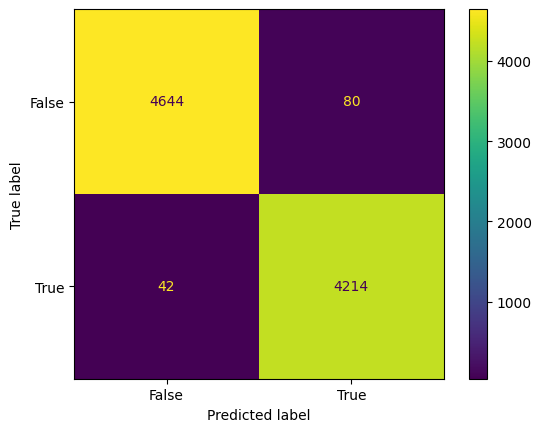

In [63]:
# Generating confusion matrix for logistic regression model
cm = confusion_matrix(y_test, y_pred_lr)

# Visualizing the confusion matrix  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [64]:
# output classification report for the logistic regression model
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4686
           1       0.99      0.98      0.99      4294

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### **Model 2: Decision Tree Classifier**

### **Data Fitting**

In [65]:
from sklearn.tree import DecisionTreeClassifier
# Instantiating the desicion tree classifier model
dtc_model = DecisionTreeClassifier()
# Fitting the training sets to the desicion tree classifier model
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier()

### **Prediction**

In [67]:
# Generating outcome predictions for the desicion tree classifier model
y_pred_dtc = dtc_model.predict(x_test)

In [68]:
# Checking predictions for the desicion tree classifier model
y_pred_dtc

array([1, 0, 0, ..., 1, 1, 0])

In [69]:
# Generating accuracy score for the desicion tree classifier model
accuracy_score(y_pred_dtc,y_test)

0.9955456570155902

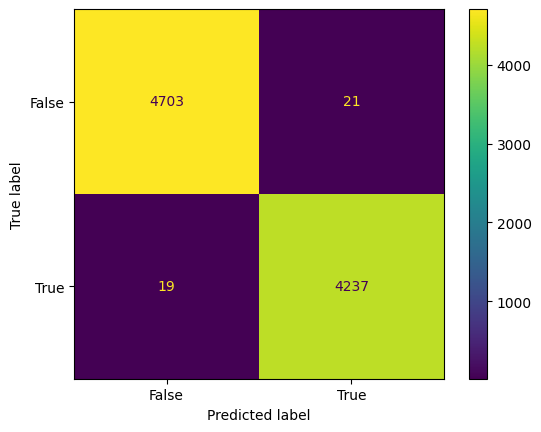

In [70]:
# Generating confusion for the desicion tree classifier model
cm = confusion_matrix(y_test, y_pred_dtc)

# Visualizing the confusion matrix  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [71]:
# Output the classification report for the decision tree classifier
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4722
           1       1.00      1.00      1.00      4258

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



### **Model 3: Random Forest Classifier**

In [72]:
from sklearn.ensemble import RandomForestClassifier
# Instantiating the random forest classifier model
rfc_model= RandomForestClassifier(n_estimators=100,criterion='entropy')
# Fitting the training sets to the model
rfc_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

### **Prediction**

In [73]:
# Generating predictions for the random forest classifier model
y_pred_rfc=rfc_model.predict(x_test)

In [74]:
# Checking predictions
y_pred_rfc

array([1, 0, 0, ..., 1, 1, 0])

In [75]:
# Generating accuracy score for the random forest classifier model
accuracy_score(y_test,y_pred_rfc)

0.9879732739420936

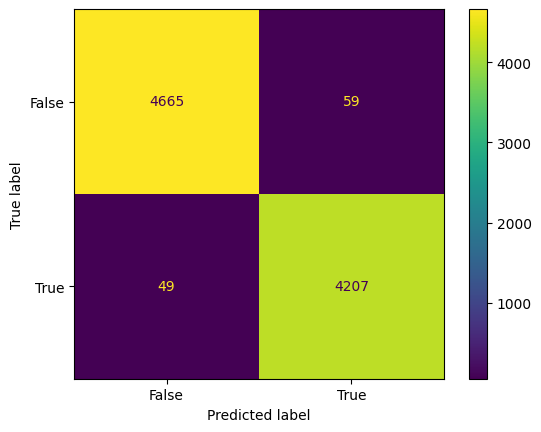

In [76]:
# Generating confusion matrix for the random forest classifier model
cm = confusion_matrix(y_test, y_pred_rfc)
# Visualizing the confusion matrix  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [77]:
# Output the classification report for the random forest classifier model
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4714
           1       0.99      0.99      0.99      4266

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## **Question 4: Model Perfomance Evaluation**

By comparing the accuracy of each model, it can be concluded that the decision tree classifier is the best model for classifying fake and true news with this data set as it has the highest accuracy score out of the 3 models.

Decsion Tree Classifier: 0.9955

Logistic Regression: 0.9864

Random Forest Classifier: 0.9880

A higher accuracy indicates a higher proportion of correct predictions.

Furthermore, as seen from the classification report of each model, the decision tree classifier also has:

*   A higher precision score, which indicates a higher proportion of correct positive predictions among the the instances predicted as positive.
*   A higher recall score, which indicates a higher proportion of true positive predictions among the actual positive instances.


